In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import missingno

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()

lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05


In [5]:
date_list = [datetime.date(2018,1,1)]
for i in range(1,365):
    date_list.append(datetime.date(2018,1,1) + datetime.timedelta(days=i))
    
#df_with_stations_as_cols = pd.DataFrame()
#df_with_stations_as_cols['Date'] = date_list
#df_with_stations_as_cols.tail()

In [6]:
aux_df = final_df.copy()
aux_df = aux_df.sort_values(by=['TipoArea'])
## Ordine: rurale, suburbano, urbano
aux_df = aux_df[['Stazione']]
aux_df.drop_duplicates(inplace=True)
aux_df = aux_df.reset_index()
aux_df = aux_df[['Stazione']]

N_stazioni = aux_df.size

matrix_with_stations_as_cols = np.empty((365,N_stazioni))
matrix_with_stations_as_cols[:] = np.nan
print(matrix_with_stations_as_cols.shape)

(365, 49)


In [7]:
aux_df.head()

,Stazione
0,BADIA
1,MALCANTONE
2,CORTE BRUGNATELLA
3,SAN PIETRO CAPOFIUME
4,FEBBIO


In [8]:
primo_giorno = datetime.date(2018,1,1)

for stazione_idx in range(N_stazioni):
    #print(stazione[0])
    stazione = aux_df.values.tolist()[stazione_idx]
    staz_internal = stazione[0]
    df_solo_stazione = final_df[final_df['Stazione'] == staz_internal]
    
    for val in df_solo_stazione.values.tolist():
        giorno = datetime.date.fromisoformat(val[7])   
        giorno_idx = (giorno - primo_giorno).days        
        matrix_with_stations_as_cols[giorno_idx,stazione_idx] = val[1]
            

In [9]:
matrix_with_stations_as_cols

array([[39., 44., 10., ..., 51., 51., 44.],
       [13., 26.,  4., ..., 28., 35., 22.],
       [12., 25.,  5., ..., 17., 25., 19.],
       ...,
       [14., 49.,  4., ..., 43., 48., 42.],
       [19., 58.,  5., ..., 52., 51., 48.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [10]:
aux_df.values.tolist()
lista_stazioni = []
for val in aux_df.values.tolist():
    lista_stazioni.append(val[0])

df_with_stations_as_cols = pd.DataFrame(matrix_with_stations_as_cols, columns = lista_stazioni, index = date_list)

In [11]:
df_with_stations_as_cols

,BADIA,MALCANTONE,CORTE BRUGNATELLA,SAN PIETRO CAPOFIUME,FEBBIO,SAN LEO,SAVIGNANO DI RIGO,GHERARDI,GAVELLO,S. ROCCO,...,CITTADELLA,DE AMICIS,CAORLE,FLAMINIA,PARCO FERRARI,PARCO MONTECUCCO,PARCO EDILCARANI,PARCO RESISTENZA,MONTEBELLO,PARCO BERTOZZI
2018-01-01,39.0,44.0,10.0,40.0,6.0,13.0,12.0,37.0,43.0,45.0,...,53.0,43.0,48.0,45.0,50.0,44.0,59.0,51.0,51.0,44.0
2018-01-02,13.0,26.0,4.0,23.0,3.0,7.0,3.0,29.0,26.0,25.0,...,25.0,19.0,30.0,36.0,22.0,19.0,17.0,28.0,35.0,22.0
2018-01-03,12.0,25.0,5.0,21.0,5.0,0.0,2.0,33.0,26.0,28.0,...,22.0,18.0,25.0,27.0,22.0,22.0,17.0,17.0,25.0,19.0
2018-01-04,15.0,30.0,3.0,28.0,2.0,5.0,5.0,36.0,29.0,35.0,...,29.0,36.0,40.0,NaN,33.0,28.0,23.0,39.0,37.0,37.0
2018-01-05,34.0,39.0,13.0,37.0,5.0,13.0,7.0,43.0,36.0,40.0,...,48.0,53.0,56.0,71.0,53.0,47.0,48.0,58.0,52.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,19.0,27.0,8.0,23.0,6.0,NaN,8.0,24.0,28.0,30.0,...,34.0,21.0,23.0,30.0,25.0,37.0,37.0,23.0,38.0,21.0
2018-12-28,16.0,43.0,6.0,40.0,6.0,NaN,7.0,NaN,53.0,48.0,...,45.0,35.0,43.0,52.0,46.0,45.0,23.0,39.0,50.0,36.0
2018-12-29,14.0,49.0,4.0,44.0,12.0,12.0,10.0,32.0,44.0,54.0,...,48.0,33.0,48.0,51.0,45.0,52.0,23.0,43.0,48.0,42.0
2018-12-30,19.0,58.0,5.0,51.0,6.0,16.0,11.0,45.0,65.0,66.0,...,51.0,38.0,57.0,60.0,63.0,47.0,29.0,52.0,51.0,48.0


<AxesSubplot: >

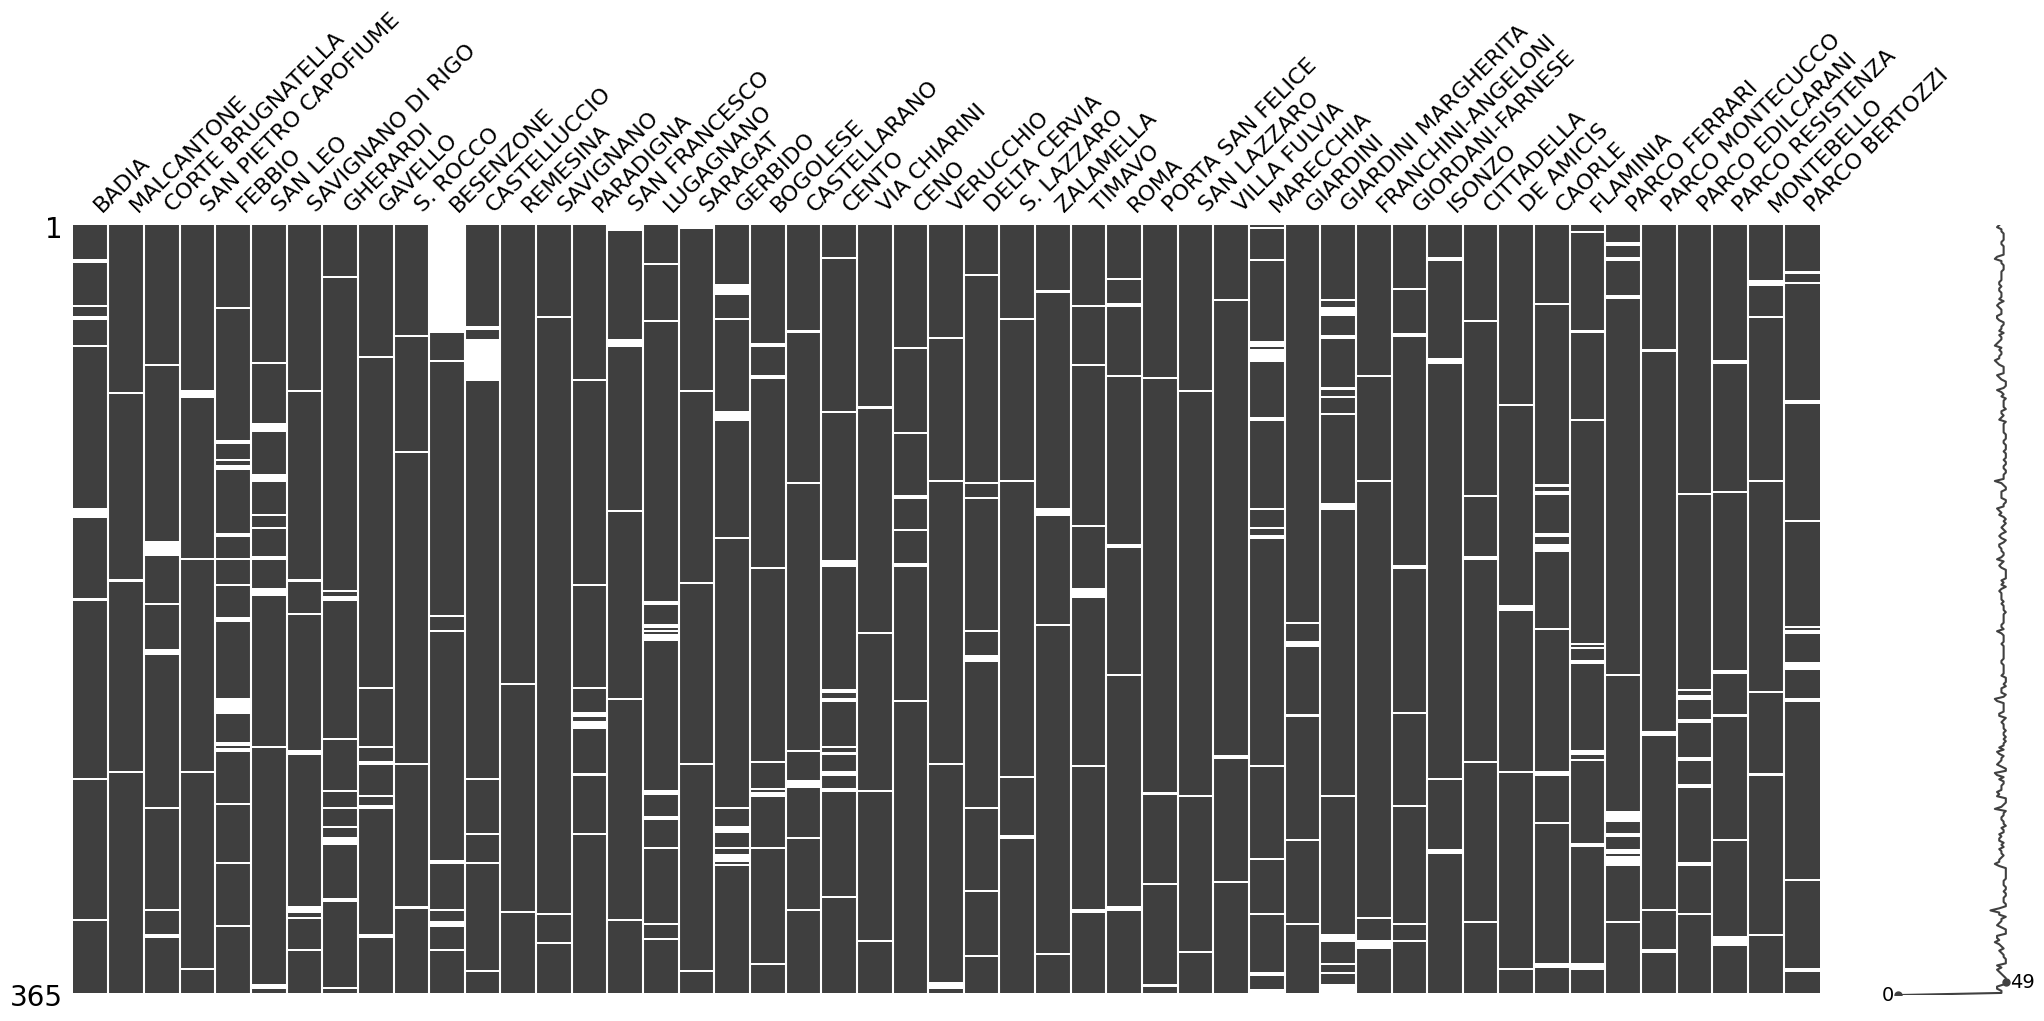

In [12]:
%matplotlib inline
missingno.matrix(df_with_stations_as_cols)

<AxesSubplot: >

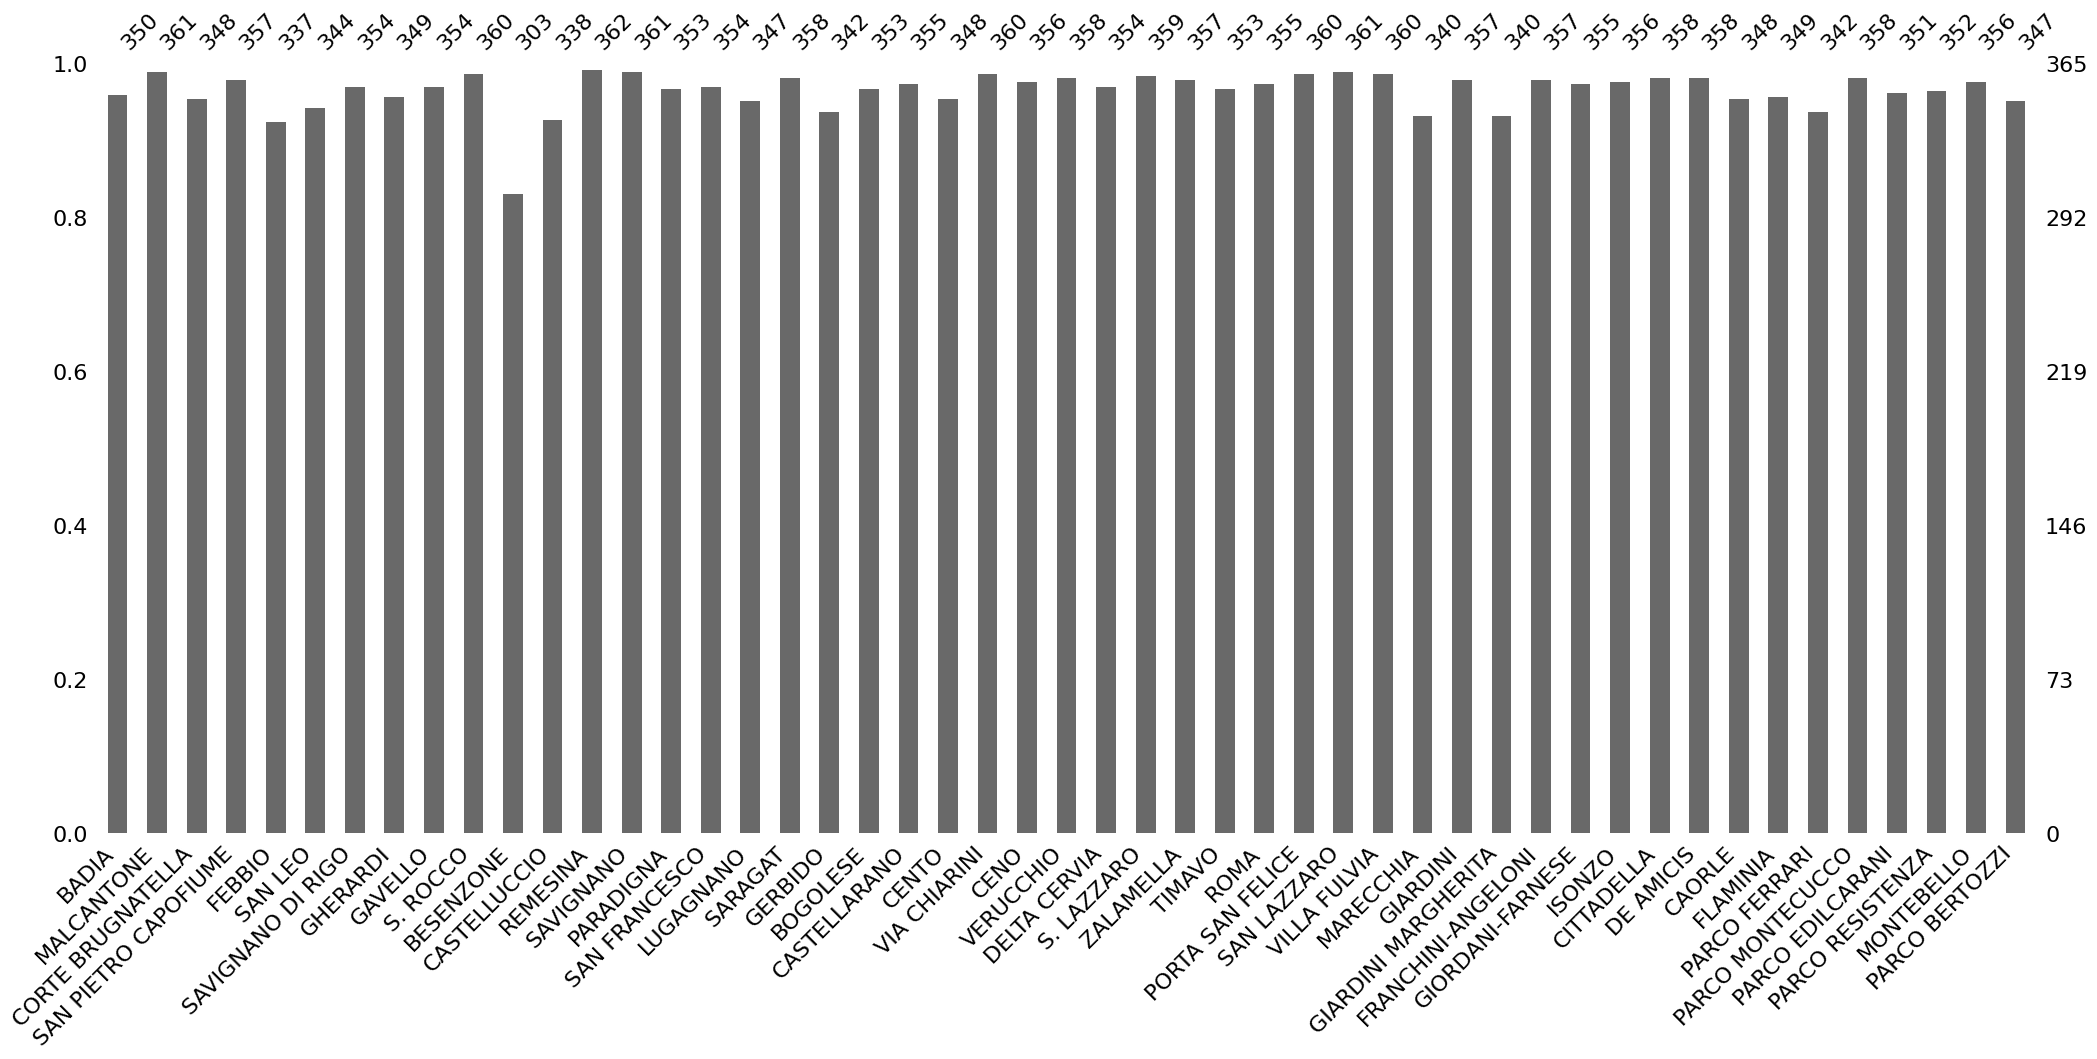

In [13]:
missingno.bar(df_with_stations_as_cols)

<AxesSubplot: >

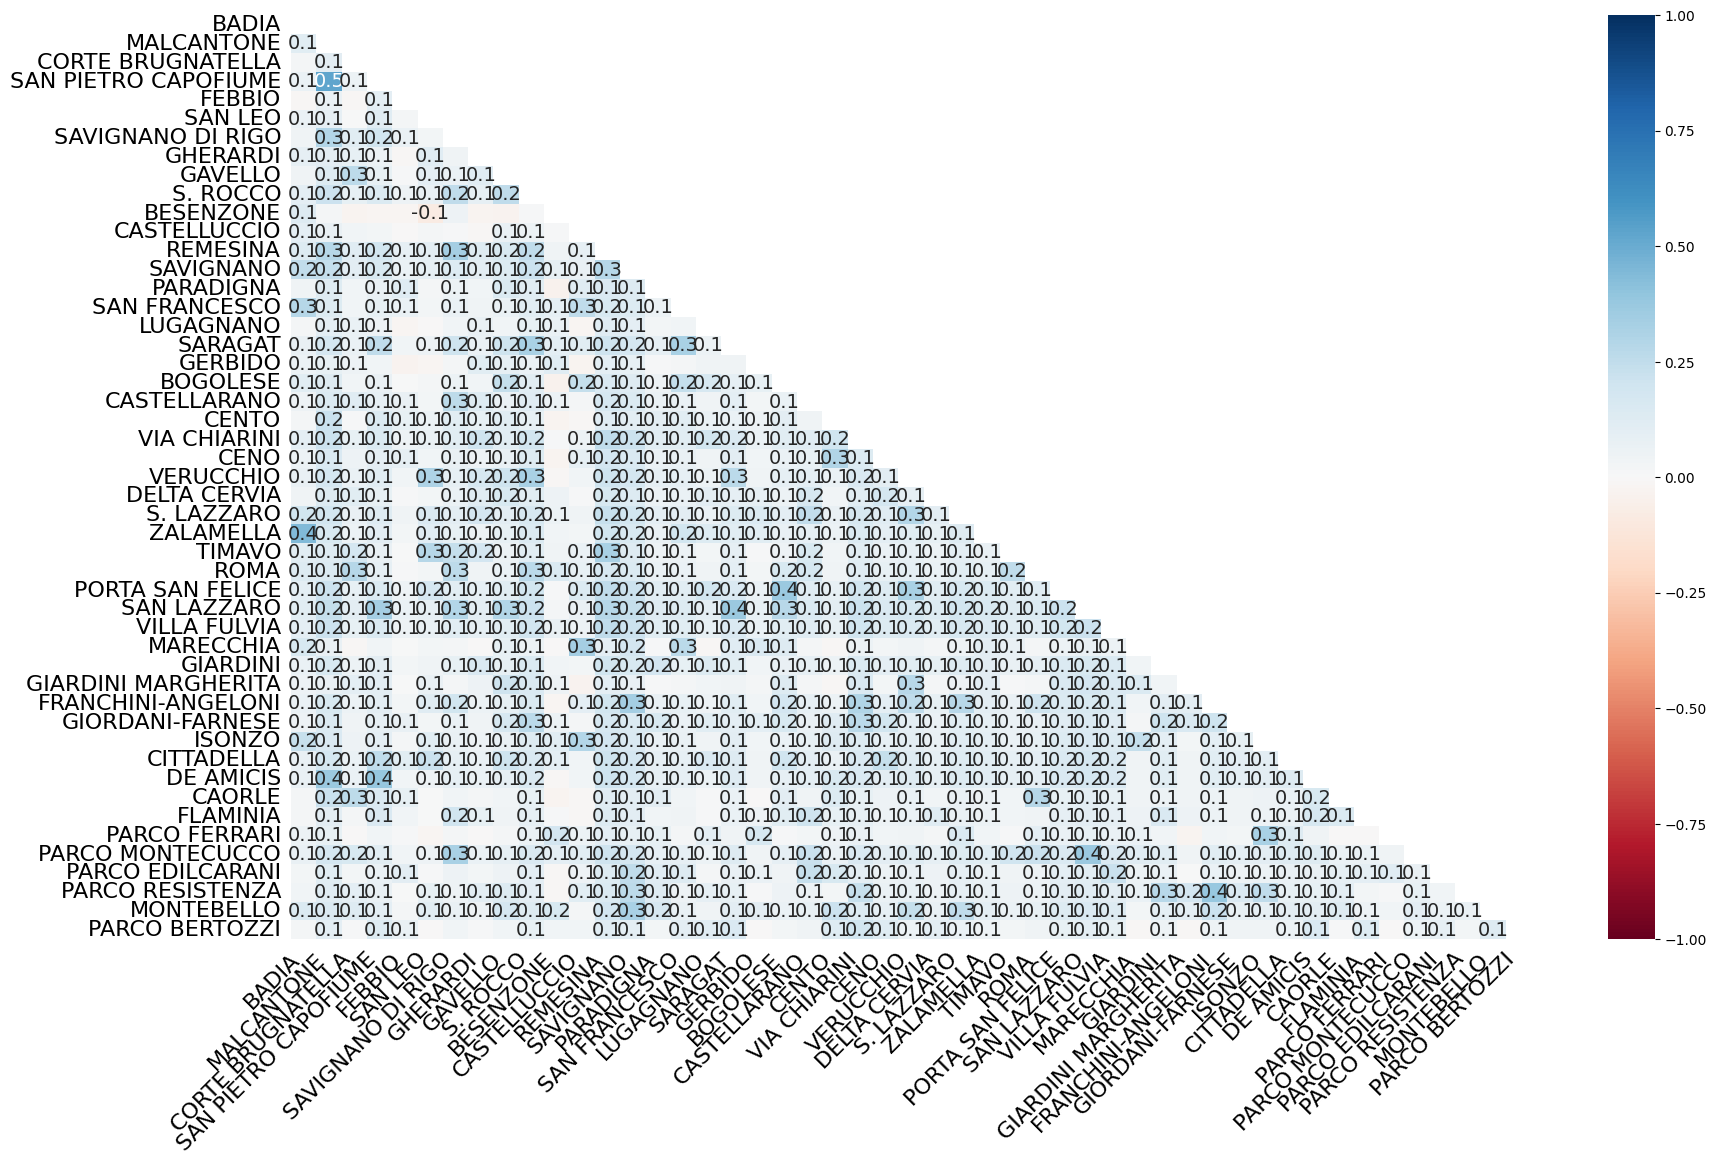

In [14]:
missingno.heatmap(df_with_stations_as_cols)